In [1]:
import pandas as pd
from pathlib import Path
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [3]:
merged_df=pd.read_csv(Path('Resources/Outputs/CV_cigaretee.csv'))
merged_df.head()

,Year-State,Inactive-Female,Inactive-Male,Inactive-Overall,Obese-Female,Obese-Male,Obese-Overall,Diabetic-Female,Diabetic-Male,Diabetic-Overall,...,Major CV Disease-Overall,current_overall,current_female,current_male,Never_overall,Never_female,Never_male,Former_overall,Former_female,Former_male
0,2011-AL,65.7,70.6,68.0,32.9,32.9,32.9,11.4,10.4,10.8,...,9.9,24.3,21.0,28.0,50.6,58.8,41.5,25.1,20.1,30.5
1,2011-AK,75.8,79.8,77.9,27.6,28.6,28.1,8.6,8.1,8.4,...,6.5,22.9,23.0,22.9,49.1,52.2,46.2,27.9,24.9,30.8
2,2011-AZ,75.9,76.3,76.1,26.7,24.9,25.7,8.1,10.0,9.0,...,7.8,19.3,17.5,21.0,55.9,61.3,50.3,24.9,21.1,28.7
3,2011-AR,67.2,72.9,70.0,32.4,31.0,31.6,9.7,11.2,10.4,...,9.8,27.0,25.2,28.9,47.9,53.0,42.6,25.1,21.8,28.6
4,2011-CA,80.1,81.8,80.9,25.1,23.9,24.6,7.9,9.2,8.4,...,6.6,13.7,10.0,17.3,62.5,70.1,54.8,23.9,19.9,27.9


In [4]:
target = []  # Initialize the target list
mean_value = merged_df["Major CV Disease-Overall"].mean()
print(mean_value)
for index, row in merged_df.iterrows():
    if row["Major CV Disease-Overall"] > mean_value:
        value = 1
        target.append(value)
    else:
        value = 0  # You might want to assign a different value for the other case
        target.append(value)
merged_df["target"] =target

7.6189189189189195


In [5]:
# only use the cigaretee data
y = merged_df["target"].values
X = merged_df.drop(columns = ["Year-State","target","Major CV Disease-Overall",'Inactive-Female', 'Inactive-Male', 'Inactive-Overall',
       'Obese-Female', 'Obese-Male', 'Obese-Overall', 'Diabetic-Female',
       'Diabetic-Male', 'Diabetic-Overall', 'Stroke-Female', 'Stroke-Male',
       'Stroke-Overall', 'Coronary Disease-Female', 'Coronary Disease-Male',
       'Coronary Disease-Overall', 'Heart Attack-Female', 'Heart Attack-Male',
       'Heart Attack-Overall', 'Major CV Disease-Female',
       'Major CV Disease-Male'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()
# Add our first Dense layer, including the input layer

nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=9))
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=9))
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 50        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 86 (344.00 Byte)
Trainable params: 86 (344.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
X.columns

Index(['current_overall', 'current_female', 'current_male', 'Never_overall',
       'Never_female', 'Never_male', 'Former_overall', 'Former_female',
       'Former_male'],
      dtype='object')

In [7]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
10/10 [==============================] - 2s 4ms/step - loss: 0.8500 - accuracy: 0.4230
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.8138 - accuracy: 0.4295
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7809 - accuracy: 0.4393
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7523 - accuracy: 0.4557
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.7264 - accuracy: 0.4984
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.7025 - accuracy: 0.5148
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6818 - accuracy: 0.5672
Epoch 8/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6611 - accuracy: 0.5967
Epoch 9/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6414 - accuracy: 0.6328
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6225 - accuracy: 0.6754
Epoch 11/50
10/10 [

In [8]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.3803 - accuracy: 0.8039 - 411ms/epoch - 103ms/step
Loss: 0.3802880048751831, Accuracy: 0.8039215803146362


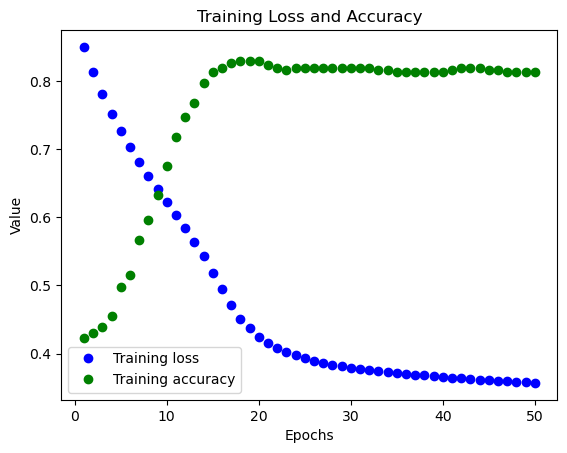

In [9]:
import matplotlib.pyplot as plt

history_dict = fit_model.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']  # You might need to adjust the key

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, accuracy_values, 'go', label='Training accuracy')  # Add accuracy line

plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

plt.show()

##  optimize 1 reduce epochs

In [10]:

# Create the Keras Sequential model
nn_model2 = tf.keras.models.Sequential()
# Add our first Dense layer, including the input layer

nn_model2.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=9))
nn_model2.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=9))
# Add the output layer that uses a probability activation function
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 50        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 86 (344.00 Byte)
Trainable params: 86 (344.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model2.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model2 = nn_model2.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 5ms/step - loss: 0.5837 - accuracy: 0.7410
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5665 - accuracy: 0.7770
Epoch 3/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5514 - accuracy: 0.7902
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5371 - accuracy: 0.7967
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 0.5228 - accuracy: 0.7967
Epoch 6/30
10/10 [==============================] - 0s 6ms/step - loss: 0.5101 - accuracy: 0.8098
Epoch 7/30
10/10 [==============================] - 0s 5ms/step - loss: 0.4984 - accuracy: 0.8131
Epoch 8/30
10/10 [==============================] - 0s 6ms/step - loss: 0.4880 - accuracy: 0.8197
Epoch 9/30
10/10 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.8230
Epoch 10/30
10/10 [==============================] - 0s 5ms/step - loss: 0.4692 - accuracy: 0.8262
Epoch 11/30
10/10 

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.4117 - accuracy: 0.8235 - 220ms/epoch - 55ms/step
Loss: 0.41172292828559875, Accuracy: 0.8235294222831726


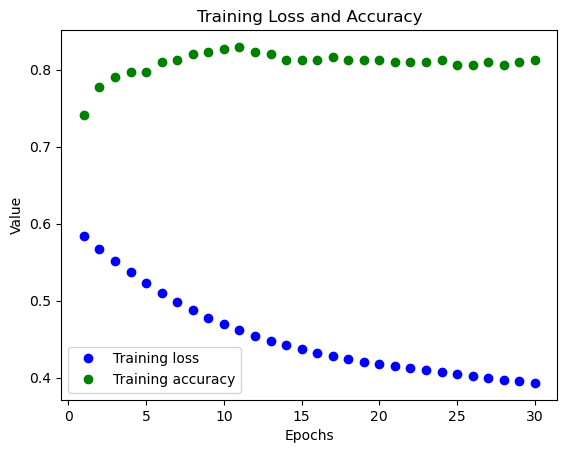

In [13]:
history_dict = fit_model2.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']  # You might need to adjust the key

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, accuracy_values, 'go', label='Training accuracy')  # Add accuracy line

plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

plt.show()

# optimize 2 adding other high risk data as inputs

In [15]:
# Use the cigrate and state disease(Obese and diabd) data
y2 = merged_df["target"].values
X2 = merged_df.drop(columns = ["Year-State","target","Major CV Disease-Overall"])

In [16]:
X2.columns

Index(['Inactive-Female', 'Inactive-Male', 'Inactive-Overall', 'Obese-Female',
       'Obese-Male', 'Obese-Overall', 'Diabetic-Female', 'Diabetic-Male',
       'Diabetic-Overall', 'Stroke-Female', 'Stroke-Male', 'Stroke-Overall',
       'Coronary Disease-Female', 'Coronary Disease-Male',
       'Coronary Disease-Overall', 'Heart Attack-Female', 'Heart Attack-Male',
       'Heart Attack-Overall', 'Major CV Disease-Female',
       'Major CV Disease-Male', 'current_overall', 'current_female',
       'current_male', 'Never_overall', 'Never_female', 'Never_male',
       'Former_overall', 'Former_female', 'Former_male'],
      dtype='object')

In [17]:
# Use sklearn to split dataset

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=78)

In [18]:
# Scale the input data

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [19]:
# Create the Keras Sequential model
nn_model3 = tf.keras.models.Sequential()
# Add our first Dense layer, including the input layer

nn_model3.add(tf.keras.layers.Dense(units=5, activation="tanh", input_dim=29))
nn_model3.add(tf.keras.layers.Dense(units=5, activation="tanh", input_dim=29))
# Add the output layer that uses a probability activation function
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the Sequential model
nn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 150       
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 186 (744.00 Byte)
Trainable params: 186 (744.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Compile the Sequential model together and customize metrics
nn_model3.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model3 = nn_model3.fit(X_train_scaled2, y_train2, epochs=30)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/30
10/10 [==============================] - 1s 4ms/step - loss: 0.7740 - accuracy: 0.3115
Epoch 2/30
10/10 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5246
Epoch 3/30
10/10 [==============================] - 0s 5ms/step - loss: 0.6238 - accuracy: 0.7443
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 0.5646 - accuracy: 0.8459
Epoch 5/30
10/10 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.9016
Epoch 6/30
10/10 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.9213
Epoch 7/30
10/10 [==============================] - 0s 5ms/step - loss: 0.4166 - accuracy: 0.9377
Epoch 8/30
10/10 [==============================] - 0s 5ms/step - loss: 0.3739 - accuracy: 0.9443
Epoch 9/30
10/10 [==============================] - 0s 6ms/step - loss: 0.3364 - accuracy: 0.9541
Epoch 10/30
10/10 [==============================] - 0s 9ms/step - loss: 0.3057 - accuracy: 0.9541
Epoch 11/30
10/10 [

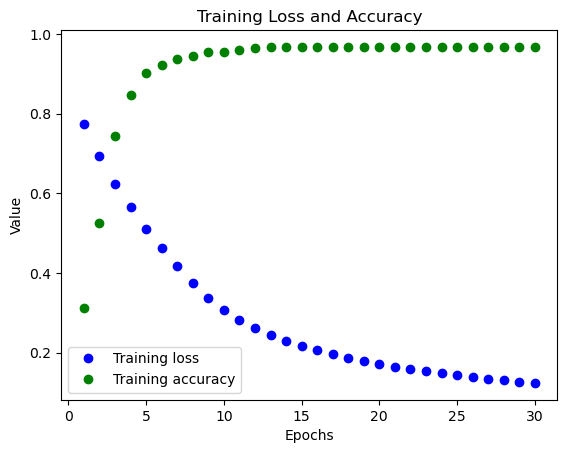

In [21]:
history_dict = fit_model3.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']  # You might need to adjust the key

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, accuracy_values, 'go', label='Training accuracy')  # Add accuracy line

plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

plt.show()

In [22]:
# Evaluate the model using the test data
model_loss3, model_accuracy3 = nn_model3.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss3}, Accuracy: {model_accuracy3}")

4/4 - 0s - loss: 0.2047 - accuracy: 0.9118 - 44ms/epoch - 11ms/step
Loss: 0.20465624332427979, Accuracy: 0.9117646813392639


# OPT4 reduce layer

In [25]:
# Create the Keras Sequential model
nn_model4 = tf.keras.models.Sequential()
# Add our first Dense layer, including the input layer

nn_model4.add(tf.keras.layers.Dense(units=20, activation="tanh", input_dim=29))
# Add the output layer that uses a probability activation function
nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the Sequential model
nn_model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                600       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 621 (2.43 KB)
Trainable params: 621 (2.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Compile the Sequential model together and customize metrics
nn_model4.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model4 = nn_model4.fit(X_train_scaled2, y_train2, epochs=30)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model4.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/30
10/10 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.8066
Epoch 2/30
10/10 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.8787
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 0.2454 - accuracy: 0.9246
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 0.1985 - accuracy: 0.9574
Epoch 5/30
10/10 [==============================] - 0s 4ms/step - loss: 0.1699 - accuracy: 0.9639
Epoch 6/30
10/10 [==============================] - 0s 5ms/step - loss: 0.1510 - accuracy: 0.9639
Epoch 7/30
10/10 [==============================] - 0s 6ms/step - loss: 0.1384 - accuracy: 0.9639
Epoch 8/30
10/10 [==============================] - 0s 5ms/step - loss: 0.1284 - accuracy: 0.9639
Epoch 9/30
10/10 [==============================] - 0s 6ms/step - loss: 0.1208 - accuracy: 0.9639
Epoch 10/30
10/10 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9639
Epoch 11/30
10/10 [

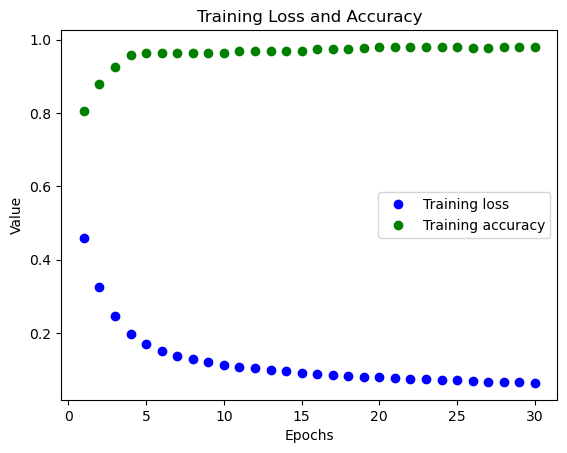

In [27]:
history_dict = fit_model4.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']  # You might need to adjust the key

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, accuracy_values, 'go', label='Training accuracy')  # Add accuracy line

plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

plt.show()

In [28]:
# Evaluate the model using the test data
model_loss4, model_accuracy4 = nn_model4.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss4}, Accuracy: {model_accuracy4}")

4/4 - 0s - loss: 0.1376 - accuracy: 0.9314 - 57ms/epoch - 14ms/step
Loss: 0.13764688372612, Accuracy: 0.9313725233078003
